<a href="https://colab.research.google.com/github/Ciss48/CrossSell_Prediction/blob/main/Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross Sell Prediction

Đây là 1 dự án để xây dựng hệ thống bán chéo, để tìm ra những người có tiềm năng mua sản phẩm 2 của những người đã mua sản phẩm 1




## Đọc dữ liệu và Import Library

In [ ]:
# Import librảy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [ ]:
# Colab connect drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/train_cross_sell.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Clean data, transform data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Gender              381109 non-null  object 
 1   Age                 381109 non-null  int64  
 2   Driving_License     381109 non-null  int64  
 3   Region_Code         381109 non-null  float64
 4   Previously_Insured  381109 non-null  int64  
 5   Vehicle_Age         381109 non-null  object 
 6   Vehicle_Damage      381109 non-null  object 
 7   Annual_Premium      381109 non-null  float64
 8   Vintage             381109 non-null  int64  
 9   Response            381109 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 29.1+ MB


In [ ]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,299.000000,1.000000


In [ ]:
# Tìm hiểu về cột Policy_Sales_Channel (chưa hiểu cột này)
df['Policy_Sales_Channel'].value_counts()

,count
Policy_Sales_Channel,
152.0,134784
26.0,79700
124.0,73995
160.0,21779
156.0,10661
...,...
149.0,1
43.0,1
144.0,1


In [ ]:
# Dữ liệu khá lộn xộn, không có ý nghĩa nên drop
df.drop(columns = ["id", "Policy_Sales_Channel"], inplace=True)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,39,0


## Scale data

In [ ]:
# Biến đổi cột gender về dạng 1, 0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,1,44,1,28.0,0,> 2 Years,Yes,40454.0,217,1
1,1,76,1,3.0,0,1-2 Year,No,33536.0,183,0
2,1,47,1,28.0,0,> 2 Years,Yes,38294.0,27,1
3,1,21,1,11.0,1,< 1 Year,No,28619.0,203,0
4,0,29,1,41.0,1,< 1 Year,No,27496.0,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,1-2 Year,No,30170.0,88,0
381105,1,30,1,37.0,1,< 1 Year,No,40016.0,131,0
381106,1,21,1,30.0,1,< 1 Year,No,35118.0,161,0
381107,0,68,1,14.0,0,> 2 Years,Yes,44617.0,74,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Khởi tạo bộ biến đổi Min-Max
scaler = MinMaxScaler()

df[['Age', 'Vintage', 'Annual_Premium']] = scaler.fit_transform(df[['Age', 'Vintage', 'Annual_Premium']])
df



,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,1,0.369231,1,28.0,0,> 2 Years,Yes,0.070366,0.716263,1
1,1,0.861538,1,3.0,0,1-2 Year,No,0.057496,0.598616,0
2,1,0.415385,1,28.0,0,> 2 Years,Yes,0.066347,0.058824,1
3,1,0.015385,1,11.0,1,< 1 Year,No,0.048348,0.667820,0
4,0,0.138462,1,41.0,1,< 1 Year,No,0.046259,0.100346,0
...,...,...,...,...,...,...,...,...,...,...
381104,1,0.830769,1,26.0,1,1-2 Year,No,0.051234,0.269896,0
381105,1,0.153846,1,37.0,1,< 1 Year,No,0.069551,0.418685,0
381106,1,0.015385,1,30.0,1,< 1 Year,No,0.060439,0.522491,0
381107,0,0.738462,1,14.0,0,> 2 Years,Yes,0.078110,0.221453,0


In [ ]:
df["Region_Code"].value_counts()

,count
Region_Code,
28.0,106415
8.0,33877
46.0,19749
41.0,18263
15.0,13308
30.0,12191
29.0,11065
50.0,10243
3.0,9251


Cột Region_Code có quá nhiều code, nó là dạng để phân loại nên ta cũng ko thể scale được , ta cũng ko thể get_dummy (tạo ra các cột tương ứng với các giá trị với giá trị là 0, 1) được. Lúc này ta để ý thấy giá trị 28.0 đang chiếm rất nhiều, nên ta sẽ tạo ra cột là 2 loại: = 28.0 và khác 28.0

In [ ]:
#Transfrom region code
df['Region_Code'] = df['Region_Code'].apply(lambda x: 1 if x == 28.0 else 0)
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,1,0.369231,1,1,0,> 2 Years,Yes,0.070366,0.716263,1
1,1,0.861538,1,0,0,1-2 Year,No,0.057496,0.598616,0
2,1,0.415385,1,1,0,> 2 Years,Yes,0.066347,0.058824,1
3,1,0.015385,1,0,1,< 1 Year,No,0.048348,0.667820,0
4,0,0.138462,1,0,1,< 1 Year,No,0.046259,0.100346,0
...,...,...,...,...,...,...,...,...,...,...
381104,1,0.830769,1,0,1,1-2 Year,No,0.051234,0.269896,0
381105,1,0.153846,1,0,1,< 1 Year,No,0.069551,0.418685,0
381106,1,0.015385,1,0,1,< 1 Year,No,0.060439,0.522491,0
381107,0,0.738462,1,0,0,> 2 Years,Yes,0.078110,0.221453,0


In [ ]:
df["Region_Code"].value_counts()

,count
Region_Code,
0,274694
1,106415


In [ ]:
df = pd.get_dummies(df, columns=['Vehicle_Age'], drop_first=True)
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,0.369231,1,1,0,Yes,0.070366,0.716263,1,False,True
1,1,0.861538,1,0,0,No,0.057496,0.598616,0,False,False
2,1,0.415385,1,1,0,Yes,0.066347,0.058824,1,False,True
3,1,0.015385,1,0,1,No,0.048348,0.667820,0,True,False
4,0,0.138462,1,0,1,No,0.046259,0.100346,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,0.830769,1,0,1,No,0.051234,0.269896,0,False,False
381105,1,0.153846,1,0,1,No,0.069551,0.418685,0,True,False
381106,1,0.015385,1,0,1,No,0.060439,0.522491,0,True,False
381107,0,0.738462,1,0,0,Yes,0.078110,0.221453,0,False,True


In [ ]:
# biến đổi yes no về 1 0
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
# biến đổi true false về 1 0
df['Vehicle_Age_< 1 Year'] = df['Vehicle_Age_< 1 Year'].map({True: 1, False: 0})
df['Vehicle_Age_> 2 Years'] = df['Vehicle_Age_> 2 Years'].map({True: 1, False: 0})

df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,0.369231,1,1,0,1,0.070366,0.716263,1,0,1
1,1,0.861538,1,0,0,0,0.057496,0.598616,0,0,0
2,1,0.415385,1,1,0,1,0.066347,0.058824,1,0,1
3,1,0.015385,1,0,1,0,0.048348,0.667820,0,1,0
4,0,0.138462,1,0,1,0,0.046259,0.100346,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,0.830769,1,0,1,0,0.051234,0.269896,0,0,0
381105,1,0.153846,1,0,1,0,0.069551,0.418685,0,1,0
381106,1,0.015385,1,0,1,0,0.060439,0.522491,0,1,0
381107,0,0.738462,1,0,0,1,0.078110,0.221453,0,0,1


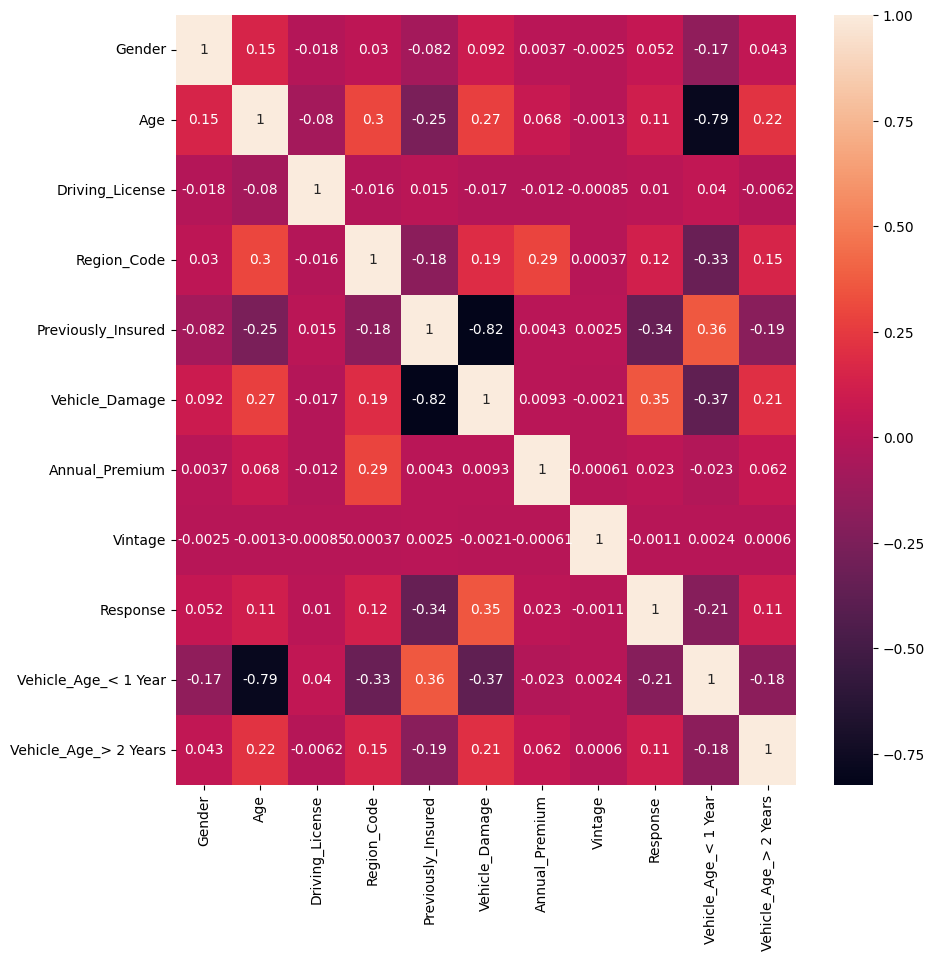

In [ ]:
# Xem correlation

fix, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

In [ ]:
# Nếu làm cẩn thận, có thể thử nghiệm nhiều, thử drop 1 trong 2 cột có corr giữa nhau cao,
# chạy với nhiều lần thử để xem như nào là tốt nhất
# Tôi đang làm theo kiểu ko để đưa kết quả vào công việc nên thôi

## Train data

In [ ]:
x = df.drop(columns = ["Response"])
y = df["Response"]
x.shape, y.shape

((381109, 10), (381109,))

In [ ]:
# Split train test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((304887, 10), (76222, 10), (304887,), (76222,))

In [ ]:
y_train.value_counts()
# Dữ liệu bị imbalanced

,count
Response,
0,267700
1,37187


In [ ]:
# Oversampling use SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
x_train_smote.shape, y_train_smote.shape

((535400, 10), (535400,))

In [ ]:
y_train_smote.value_counts()

,count
Response,
1,267700
0,267700


## Xây dựng mô hình

### Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66699
           1       0.26      0.97      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

Accuracy: 0.6415864186192962
Precision: 0.25528052805280527
Recall: 0.9746928488921558
F1 Score: 0.4045942941830308


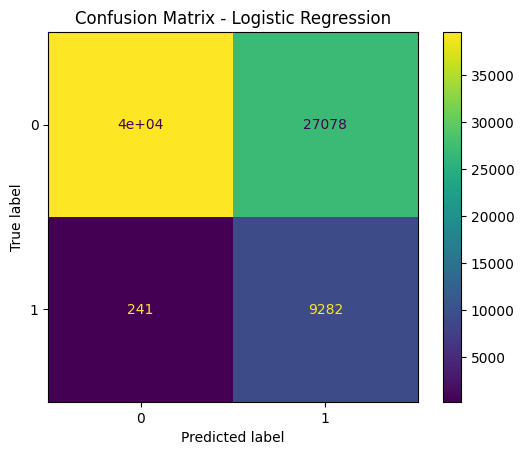

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Huấn luyện mô hình Logistic Regression
model_log = LogisticRegression()
model_log.fit(x_train_smote, y_train_smote)

# Dự đoán trên tập kiểm tra
y_pred_log = model_log.predict(x_test)

# In báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

# In các chỉ số chi tiết
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))

# Vẽ ma trận nhầm lẫn (Confusion Matrix)
ConfusionMatrixDisplay.from_estimator(model_log, x_test, y_test)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


### XGBoost

In [ ]:
x_train_smote = x_train_smote.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Less_1Year", "Vehicle_Age_> 2 Years": "Vehicle_More_2Year" }, errors="raise")
x_test = x_test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Less_1Year", "Vehicle_Age_> 2 Years": "Vehicle_More_2Year" }, errors="raise")

              precision    recall  f1-score   support

           0       0.97      0.70      0.82     66699
           1       0.29      0.87      0.44      9523

    accuracy                           0.72     76222
   macro avg       0.63      0.78      0.63     76222
weighted avg       0.89      0.72      0.77     76222



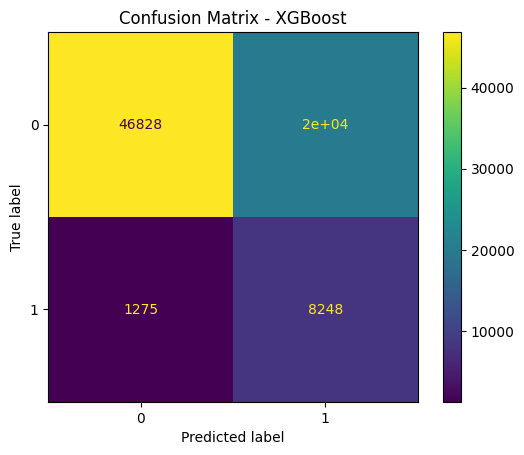

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import xgboost as xgb

# Khởi tạo và huấn luyện mô hình XGBoost
model_xgb = xgb.XGBClassifier(random_state=42, n_estimators=100)
model_xgb.fit(x_train_smote, y_train_smote)

# Dự đoán trên tập kiểm tra
y_pred = model_xgb.predict(x_test)

# In báo cáo đánh giá
print(classification_report(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(model_xgb, x_test, y_test)
plt.title("Confusion Matrix - XGBoost")
plt.show()


### Random Forest

              precision    recall  f1-score   support

           0       0.92      0.84      0.88     66699
           1       0.30      0.48      0.37      9523

    accuracy                           0.80     76222
   macro avg       0.61      0.66      0.62     76222
weighted avg       0.84      0.80      0.81     76222



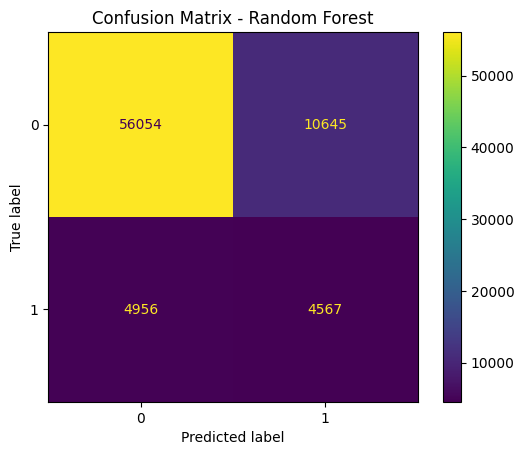

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Khởi tạo và huấn luyện mô hình Random Forest
forest = RandomForestClassifier(random_state=42)
forest.fit(x_train_smote, y_train_smote)

# Dự đoán trên tập kiểm tra
y_pred = forest.predict(x_test)

# In báo cáo đánh giá
print(classification_report(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(forest, x_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()


## Kết luận
Vì bài toán của ta đang quan tâm đặc biệt đến những người có khả năng trở thành khách hàng tiềm năng. Vì vậy chỉ số recall đối với lớp = 1 là quan trọng nhất
= > Chọn mô hình Logistic Regression với recall cho lớp = 1 là 97%